In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [21]:
import tensorflow as tf
from tensorflow import keras

## Creating Artificical Neural Network 

1) WE are using the fashion MNIST datatset with 28x28 pixel images and 10 classes 

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [24]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [25]:
X_train_n = X_train_full/255.
X_test_n = X_test / 255.

In [26]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


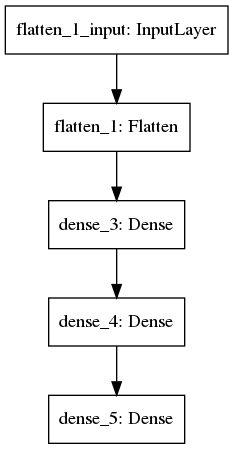

In [29]:
import pydot
keras.utils.plot_model(model)

In [30]:
weights, biases = model.layers[1].get_weights()

In [31]:
weights.shape

(784, 300)

for more details on loss functions and other paramaters refer: 

Documentation - https://keras.io/models/sequential/

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

#### In our case, beacuse we have different labels, our loss function is sparse_categorical_crossentropy, if we had labels like (0,1) we would use binary_crossentropy 

#### for optimzer we use sgd which is stochiastic gradient decent, which is mentioned in the notes 

#### for metrics we want accuracy as this is a classification problem, if it were a regression one, we would use MSE

In [41]:
model_history = model.fit(X_train, y_train,epochs=50, validation_data= (X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2207 - accuracy: 0.9198 - val_loss: 0.2888 - val_accuracy: 0.8954
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2175 - accuracy: 0.9223 - val_loss: 0.2902 - val_accuracy: 0.8972
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2140 - accuracy: 0.9223 - val_loss: 0.3696 - val_accuracy: 0.8658
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2104 - accuracy: 0.9254 - val_loss: 0.2920 - val_accuracy: 0.8968
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2086 - accuracy: 0.9244 - val_loss: 0.2806 - val_accuracy: 0.8986
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2033 - accuracy: 0.9271 - val_loss: 0.2970 - val_accuracy: 0.8936
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2004 - accuracy: 0.9294 - val_loss: 0.2925 - val_accuracy:

In [42]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [43]:
model_history.history

{'loss': [0.22065266966819763,
  0.21751537919044495,
  0.21399863064289093,
  0.210396870970726,
  0.2086394876241684,
  0.20330239832401276,
  0.2004118114709854,
  0.19764778017997742,
  0.19402514398097992,
  0.19067956507205963,
  0.18878689408302307,
  0.18479199707508087,
  0.18181060254573822,
  0.17969900369644165,
  0.17650920152664185,
  0.17412911355495453,
  0.1710270196199417,
  0.16867022216320038,
  0.1658162623643875,
  0.16289743781089783,
  0.1600000560283661,
  0.15811099112033844,
  0.15551409125328064,
  0.1527961641550064,
  0.15013359487056732,
  0.1483280062675476,
  0.14551113545894623,
  0.14364373683929443,
  0.14092965424060822,
  0.1388065665960312,
  0.13669447600841522,
  0.13435880839824677,
  0.13230650126934052,
  0.13006919622421265,
  0.12665699422359467,
  0.12630817294120789,
  0.12390482425689697,
  0.1203371062874794,
  0.12098198384046555,
  0.11774766445159912,
  0.11676251143217087,
  0.11483391374349594,
  0.11168797314167023,
  0.1094581931

<function matplotlib.pyplot.show(close=None, block=None)>

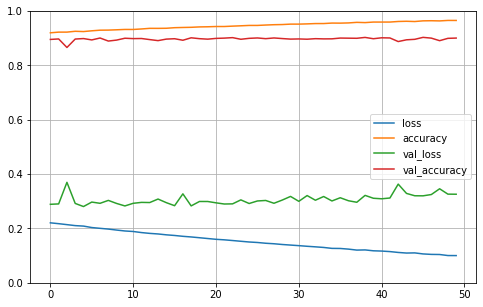

In [44]:
import pandas as pd 

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [45]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 784us/step - loss: 0.3694 - accuracy: 0.8913


[0.3693820536136627, 0.8913000226020813]

In [46]:
X_new = X_test[:3]